# 1. Setup

## 1.1 Import Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

## 1.2 Necessary Functions

In [2]:
def analyze_unique_values(data_frame):
    """
    Analyzes and prints unique values in each column of the given DataFrame.
    
    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    for col in data_frame.columns:
        unique_count = data_frame[col].nunique()
        data_type = data_frame[col].dtypes

        print("Column: {}".format(col))
        print("Unique Values Count: {}".format(unique_count))
        print("Data Type: {}".format(data_type))

        if data_type in ['int64', 'float', 'object']:
            unique_values = data_frame[col].unique()[:5]  # Display the first 5 unique values
            print("Unique Values:")
            for value in unique_values:
                print("- {}".format(value))

            if unique_count > 5:
                print("... and {} more unique values".format(unique_count - 5))

        print("------------------------------------------------------------")

def print_columns_by_dtype(data_frame):
    """
    Prints columns for each data type in the given DataFrame.
    
    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    unique_dtypes = data_frame.dtypes.unique()
    
    for dtype in unique_dtypes:
        matching_columns = [col for col in data_frame.columns if data_frame[col].dtypes == dtype]
        
        print("Columns with data type {}: {}".format(dtype, ', '.join(matching_columns)))
        print("------------------------------------------------------------")

def analyze_missing_values(data_frame):
    """
    Analyzes and prints missing values count and percentages for each column in the given DataFrame.
    The table is sorted from highest missing values count to lowest.
    
    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    missing_values_count = data_frame.isnull().sum()
    total_missing_values = missing_values_count.sum()

    # Calculate the percentage of missing values for each column
    total_rows = data_frame.shape[0]
    missing_percentage = (missing_values_count / total_rows) * 100

    # Create a list of tuples (column_name, missing_count, missing_percentage)
    missing_info = [(column, count, percentage) for column, count, percentage in zip(missing_values_count.index, missing_values_count.values, missing_percentage.values)]

    # Sort the list by missing_count in descending order
    missing_info.sort(key=lambda x: x[1], reverse=True)

    # Print the sorted table
    print("COLUMN | MISSING VALUES PERCENTAGE | MISSING VALUE COUNT")
    print("-----------------------------------------")
    for column, count, percentage in missing_info:
        print(f"{column}: {percentage:.2f}% ({count} missing)")

    print("\nMissing Values Count:")
    print(missing_values_count)
    print("\nTotal Missing Values:", total_missing_values)

def analyze_column_types(data_frame):
    """
    Analyzes and prints categorical and continuous columns along with their names and counts.
    
    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    categorical_columns = []
    continuous_columns = []
    
    for col in data_frame.columns:
        unique_count = data_frame[col].nunique()
        
        if np.issubdtype(data_frame[col].dtype, np.number) or unique_count > 20:
            continuous_columns.append(col)
        else:
            categorical_columns.append(col)
    
    print("Categorical columns: {}".format(', '.join(categorical_columns)))
    print("Count: {}\n".format(len(categorical_columns)))
    
    print("Continuous columns: {}".format(', '.join(continuous_columns)))
    print("Count: {}\n".format(len(continuous_columns)))

# 2. Import Files for Analysis

In [3]:
file = 'KPMG_VI_New_raw_data_update_final.xlsx'

# sheets selected for analysis
sheets = ['Transactions', 'CustomerDemographic', 'CustomerAddress']

# Dictionary to store DataFrames
dfs = {}

# Loop through the sheet names and read the corresponding sheets
for sheet_name in sheets:
    dfs[f'df_{sheet_name.lower()}'] = pd.read_excel(
        file,
        sheet_name,
        skiprows=1
    )

# Access the DataFrames using their keys
df_transactions = dfs['df_transactions']
df_demographic = dfs['df_customerdemographic']
df_address = dfs['df_customeraddress']    

# 3. Demographic Table

## 3.1 Data Overview

### 3.1.1 Check Header and Info

In [4]:
df_demographic.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0


In [5]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [6]:
df_demographic.shape

(4000, 13)

In [7]:
df_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

### 3.1.2 Check Unique Values

In [8]:
# Checking unique values in each column
analyze_unique_values(df_demographic)

Column: customer_id
Unique Values Count: 4000
Data Type: int64
Unique Values:
- 1
- 2
- 3
- 4
- 5
... and 3995 more unique values
------------------------------------------------------------
Column: first_name
Unique Values Count: 3139
Data Type: object
Unique Values:
- Laraine
- Eli
- Arlin
- Talbot
- Sheila-kathryn
... and 3134 more unique values
------------------------------------------------------------
Column: last_name
Unique Values Count: 3725
Data Type: object
Unique Values:
- Medendorp
- Bockman
- Dearle
- nan
- Calton
... and 3720 more unique values
------------------------------------------------------------
Column: gender
Unique Values Count: 6
Data Type: object
Unique Values:
- F
- Male
- Female
- U
- Femal
... and 1 more unique values
------------------------------------------------------------
Column: past_3_years_bike_related_purchases
Unique Values Count: 100
Data Type: int64
Unique Values:
- 93
- 81
- 61
- 33
- 56
... and 95 more unique values
-----------------------

### 3.1.3 Check Data Type

In [9]:
print_columns_by_dtype(df_demographic) 

Columns with data type int64: customer_id, past_3_years_bike_related_purchases
------------------------------------------------------------
Columns with data type object: first_name, last_name, gender, job_title, job_industry_category, wealth_segment, deceased_indicator, default, owns_car
------------------------------------------------------------
Columns with data type datetime64[ns]: DOB
------------------------------------------------------------
Columns with data type float64: tenure
------------------------------------------------------------


### 3.1.4 Check Missing Values

In [10]:
analyze_missing_values(df_demographic)

COLUMN | MISSING VALUES PERCENTAGE | MISSING VALUE COUNT
-----------------------------------------
job_industry_category: 16.40% (656 missing)
job_title: 12.65% (506 missing)
default: 7.55% (302 missing)
last_name: 3.12% (125 missing)
DOB: 2.17% (87 missing)
tenure: 2.17% (87 missing)
customer_id: 0.00% (0 missing)
first_name: 0.00% (0 missing)
gender: 0.00% (0 missing)
past_3_years_bike_related_purchases: 0.00% (0 missing)
wealth_segment: 0.00% (0 missing)
deceased_indicator: 0.00% (0 missing)
owns_car: 0.00% (0 missing)

Missing Values Count:
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default            

### 3.1.5 Check Types of Data Attributes

In [11]:
analyze_column_types(df_demographic)

Categorical columns: gender, job_industry_category, wealth_segment, deceased_indicator, owns_car
Count: 5

Continuous columns: customer_id, first_name, last_name, past_3_years_bike_related_purchases, DOB, job_title, default, tenure
Count: 8



### 3.1.6 Summary of Data Overview

The provided dataset comprises **4000 records** and **13 columns**, including **5 categorical columns** and **8 continuous columns**.

**Issues and Mitigation**

1. **Inconsistent Gender Column:** The gender column contains inconsistent values that need to be addressed to ensure data integrity.

2. **Date of Birth (DOB) Conversion:** The DOB column can be transformed into age or age class, adding insightful information to the dataset.

3. **Irrelevant Columns:** The 'default' column holds no relevant information and should be dropped from the dataset.

4. **Tenure Data Type Correction:** The 'tenure' column should be represented as integers to accurately reflect customer tenure.

5. **Boolean Conversion:** The 'deceased_indicator' and 'owns_car' columns should be converted to Boolean data types.

6. **Handling Deceased Customers:** Records with 'deceased_indicator' values of 'Y' do not pertain to current customers and should be removed.

7. **Missing Values:** The dataset contains **1763 missing values** that require appropriate handling techniques.

## 3.2 Data Wrangling

Make a copy of the data before working with it.

In [12]:
df_demographic1 = df_demographic.copy()

In [13]:
#df_demographic = df_demographic1

In [14]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

### 3.2.1 Drop Columns

In [15]:
column_drop = ['default']
df_demographic.drop(columns=column_drop, inplace=True)

In [16]:
df_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

### 3.2.2 Handling Missing Values

In [17]:
analyze_missing_values(df_demographic)

COLUMN | MISSING VALUES PERCENTAGE | MISSING VALUE COUNT
-----------------------------------------
job_industry_category: 16.40% (656 missing)
job_title: 12.65% (506 missing)
last_name: 3.12% (125 missing)
DOB: 2.17% (87 missing)
tenure: 2.17% (87 missing)
customer_id: 0.00% (0 missing)
first_name: 0.00% (0 missing)
gender: 0.00% (0 missing)
past_3_years_bike_related_purchases: 0.00% (0 missing)
wealth_segment: 0.00% (0 missing)
deceased_indicator: 0.00% (0 missing)
owns_car: 0.00% (0 missing)

Missing Values Count:
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenur

|   Columns   |                  Description                 |                          Mitigation                          |
|:-----------:|:--------------------------------------------:|:------------------------------------------------------------:|
|  last_name  | The column assumes that users haven't provided their last names in the database | Replace missing last names with their corresponding first names|
|  DOB        | The most frequent value (mode) in the 'DOB' column has a lower occurrence than the count of missing values | Fill missing values with values from the previous row |
|  job_title  | The most frequent value (mode) in the 'job_title' column has a lower occurrence than the count of missing values | Fill missing values with values from the previous row |
|  job_industry_category| Considering the frequency of the missing values is large (16.40%) and the highest occurence is nearly equivalent | Fill missing values with values from the previous row | Fill the missing values by using data from the preceding row
|  tenure     | Data does not follow a specific pattern or trend and is spread out across a range of values | Impute with Random Sampling |


<details>
    <summary><strong>last_name</strong></summary>

Replace missing last names with their corresponding first names

</details>

In [18]:
# Replace missing last names with corresponding first names
df_demographic.loc[df_demographic['last_name'].isnull(), 'last_name'] = df_demographic['first_name']

In [19]:
df_demographic['last_name'].isnull().sum()

0

<details>
    <summary><strong>BOD</strong></summary>

Fill missing values with values from the previous row.

</details>

In [20]:
df_demographic['DOB'].value_counts()

1978-01-30    7
1964-07-08    4
1962-12-17    4
1978-08-19    4
1977-05-13    4
             ..
1989-06-16    1
1998-09-30    1
1985-03-11    1
1989-10-23    1
1991-11-05    1
Name: DOB, Length: 3448, dtype: int64

In [21]:
df_demographic['DOB'].isnull().sum()

87

The most frequent value (mode) in the 'DOB' column has a lower occurrence than the count of missing values. As a result, using the mean for imputation is not suitable. Instead, we will fill in the missing values with the values from the previous row. Use `ffill` which is the (forward fill) method to fill missing values with values from the previous row.

In [22]:
# Fill missing values with values from the previous row
df_demographic['DOB'].fillna(method='ffill', inplace=True)

In [23]:
df_demographic['DOB'].isnull().sum()

0

<details>
    <summary><strong>job_title</strong></summary>

Fill missing values with values from the previous row.

</details>

In [24]:
df_demographic['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [25]:
df_demographic['job_title'].isnull().sum()

506

In [26]:
df_demographic['job_title'].shape

(4000,)

In [27]:
# Fill missing values with values from the previous row
df_demographic['job_title'].fillna(method='ffill', inplace=True)

In [28]:
df_demographic['job_title'].isnull().sum()

0

<details>
    <summary><strong>job_industry_category</strong></summary>

Fill missing values with values from the previous row.

</details>

In [29]:
df_demographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [30]:
df_demographic['job_industry_category'].isnull().sum()

656

In [31]:
# Fill missing values with values from the previous row
df_demographic['job_industry_category'].fillna(method='ffill', inplace=True)

In [32]:
df_demographic['job_industry_category'].isnull().sum()

0

<details>
    <summary><strong>tenure</strong></summary>

 Simulate the distribution of 'tenure' and randomly sample from it to fill the missing values. This approach maintains the general shape of the distribution and introduces variability.

</details>

In [33]:
df_demographic['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

In [34]:
df_demographic['tenure'].isnull().sum()

87

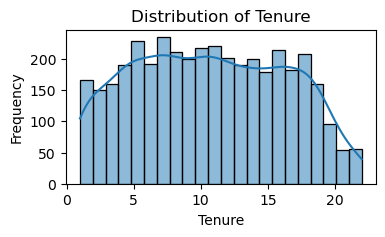

In [35]:
bin_value = df_demographic['tenure'].nunique()
# Create a histogram of the 'tenure' column
plt.figure(figsize=(4, 2))
sns.histplot(data=df_demographic, x='tenure', bins=bin_value, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Calculate mean and standard deviation of 'tenure' column
mean_tenure = df_demographic['tenure'].mean()
std_dev_tenure = df_demographic['tenure'].std()

# Generate random samples based on a Normal distribution
num_missing = df_demographic['tenure'].isnull().sum()
imputed_values = np.random.normal(mean_tenure, std_dev_tenure, num_missing)

# Round random samples to integers and ensure they are greater than 0
imputed_values = np.round(imputed_values).astype(int)
imputed_values = np.maximum(imputed_values, 1)

# Replace missing values with random samples
missing_indices = df_demographic[df_demographic['tenure'].isnull()].index
df_demographic.loc[missing_indices, 'tenure'] = imputed_values

In [37]:
df_demographic['tenure'].isnull().sum()

0

In [38]:
df_demographic['tenure'].value_counts()

7.0     236
5.0     231
11.0    227
10.0    224
16.0    220
8.0     216
18.0    209
12.0    209
14.0    208
9.0     206
6.0     198
13.0    198
4.0     194
15.0    185
17.0    183
1.0     174
3.0     162
19.0    161
2.0     152
20.0     97
22.0     56
21.0     54
Name: tenure, dtype: int64

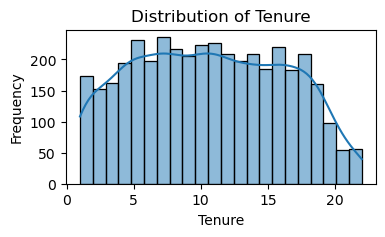

In [39]:
bin_value = df_demographic['tenure'].nunique()
# Create a histogram of the 'tenure' column
plt.figure(figsize=(4, 2))
sns.histplot(data=df_demographic, x='tenure', bins=bin_value,kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

Check if there are any missing values left.

In [40]:
analyze_missing_values(df_demographic)

COLUMN | MISSING VALUES PERCENTAGE | MISSING VALUE COUNT
-----------------------------------------
customer_id: 0.00% (0 missing)
first_name: 0.00% (0 missing)
last_name: 0.00% (0 missing)
gender: 0.00% (0 missing)
past_3_years_bike_related_purchases: 0.00% (0 missing)
DOB: 0.00% (0 missing)
job_title: 0.00% (0 missing)
job_industry_category: 0.00% (0 missing)
wealth_segment: 0.00% (0 missing)
deceased_indicator: 0.00% (0 missing)
owns_car: 0.00% (0 missing)
tenure: 0.00% (0 missing)

Missing Values Count:
customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                               

In [41]:
df_demographic2 = df_demographic.copy()

### 3.2.3 Identify Duplicate

In [42]:
dups = df_demographic.duplicated()
df_demographic[dups].sum()

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
dtype: float64

The data appears to be free of duplicate values, which is a good.

### 3.2.4 Data Formatting

In [43]:
df_demographic[["tenure"]] = df_demographic[["tenure"]].astype("int64")

In [44]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  4000 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

### 3.2.5 Handling Inconsistencies

<details>
    <summary><strong>gender</strong></summary>

Replace 'U', 'Femal', 'M' , 'F' leaving only 'Male' and 'Female'

</details>

In [45]:
df_demographic['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [46]:
df_demographic['gender'].replace({'U': 'Unspecified', 'F': 'Female', 'Femal': 'Female', 'M': 'Male'}, inplace=True)

In [47]:
df_demographic['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

Replace 'Unspecified' with the highest counts which is 'Female'.

In [48]:
df_demographic['gender'].replace({'Unspecified': 'Female'}, inplace=True)

In [49]:
df_demographic['gender'].value_counts()

Female    2127
Male      1873
Name: gender, dtype: int64

<details>
    <summary><strong>deceased_indicator</strong></summary>

- Remove rows with 'Y' indicating already deceased.
- Drop the 'deceased_indicator' column as we prepare dataset for living customer only.

</details>

In [50]:
df_demographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [51]:
df_demographic.loc[df_demographic['deceased_indicator'] == 'Y']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
752,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Y,Yes,6
3789,3790,Kurtis,Morson,Male,91,1959-05-31,Senior Editor,Retail,Mass Customer,Y,Yes,9


In [52]:
df_demographic.drop(df_demographic.loc[df_demographic['deceased_indicator'] == 'Y'].index, inplace=True)


In [53]:
df_demographic['deceased_indicator'].value_counts()

N    3998
Name: deceased_indicator, dtype: int64

Drop 'deceased_indicator' column as we already prepared dataset with living customers.

In [54]:
column_drop = ['deceased_indicator']
df_demographic.drop(columns=column_drop, inplace=True)

In [55]:
df_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure'],
      dtype='object')

### 3.2.6 Feature Engineering

<details>
    <summary><strong>DOB</strong></summary>

- Calculate age for each customer.
- Choose 9/8/2023 as reference date.
- Drop 'DOB' column as the dataset already had age.

</details>

In [56]:
df_demographic['DOB'] 

0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
3995   1975-08-09
3996   2001-07-13
3997   2001-07-13
3998   1973-10-24
3999   1991-11-05
Name: DOB, Length: 3998, dtype: datetime64[ns]

In [57]:
# Calculate age based on reference year 2023
reference_year = pd.to_datetime('2023-08-09')  # Assuming the reference year is January 1, 2023
df_demographic['age'] = (reference_year - df_demographic['DOB']).dt.days // 365

In [58]:
df_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15,69
3,4,Talbot,Talbot,Male,33,1961-10-03,Recruiting Manager,IT,Mass Customer,No,7,61
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,Yes,8,46


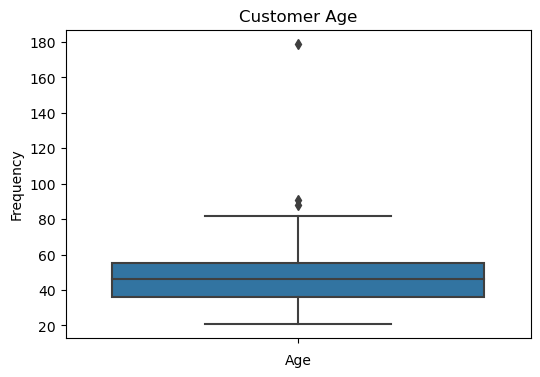

In [59]:
# Create plots of the 'age' column
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_demographic, y='age')
plt.title('Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [60]:
sorted_df = df_demographic.sort_values(by='age')

sorted_df[['customer_id', 'first_name', 'last_name', 'gender', 'age']].tail()

,customer_id,first_name,last_name,gender,age
2413,2414,Basile,Bowlas,Female,80
3409,3410,Merrili,Brittin,Female,82
1091,1092,Katlin,Creddon,Female,88
719,720,Darrel,Canet,Male,91
33,34,Jephthah,Bachmann,Female,179


The data indicates that the oldest age belongs to Jephthah Bachmann, who is currently at age 179. It would be wise to verify the accuracy of this customer’s age. For modelling purpose, this particular customer is excluded to remove extreme outlier in the data.

In [61]:
df_demographic.drop(df_demographic.loc[df_demographic['customer_id'] == 34].index, inplace=True)

In [62]:
column_drop = ['DOB']
df_demographic.drop(columns=column_drop, inplace=True)

Almost finished the data cleaning for `Demographic Table`, save a backup data.

In [63]:
df_demographic1 = df_demographic.copy()

In [64]:
df_demographic['age'].value_counts()

45    255
46    184
48    135
44    134
49    133
47    128
43    119
37    113
42    108
50    104
36     91
28     88
64     87
26     80
59     80
56     79
61     78
63     76
38     76
54     75
51     75
24     74
35     74
52     73
34     73
27     73
29     71
31     70
33     70
58     69
57     68
25     67
53     67
55     67
67     66
66     64
30     63
60     63
68     60
65     59
69     58
62     58
23     52
41     51
32     43
40     41
39     39
22     37
21     20
70      3
80      2
79      1
91      1
88      1
82      1
Name: age, dtype: int64

In [65]:
# Define age class ranges
bins = [20, 29, 39, 49, 59, 69, 79, 89, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Create 'age_class' column based on age class ranges
df_demographic['age_class'] = pd.cut(df_demographic['age'], bins=bins, labels=labels, right=False)

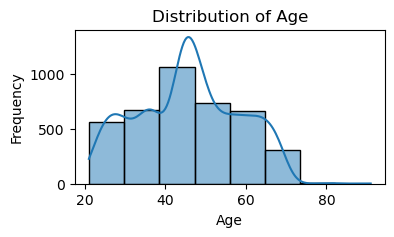

In [66]:
bin_value = df_demographic['age_class'].nunique()

# Create a histogram of the 'tenure' column
plt.figure(figsize=(4, 2))
sns.histplot(data=df_demographic, x='age', bins=bin_value,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [67]:
df_demographic[["age_class"]] = df_demographic[["age_class"]].astype("object")

Drop 'age' column as the data already prepared with 'age_class'.

In [68]:
column_drop = ['age']
df_demographic.drop(columns=column_drop, inplace=True)

In [69]:
df_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,70-79
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16,40-49
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,Yes,15,70-79
3,4,Talbot,Talbot,Male,33,Recruiting Manager,IT,Mass Customer,No,7,60-69
4,5,Sheila-kathryn,Calton,Female,56,Senior Editor,IT,Affluent Customer,Yes,8,40-49


## 3.3 Save as CSV

Final check for the data.

In [70]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          3997 non-null   int64 
 1   first_name                           3997 non-null   object
 2   last_name                            3997 non-null   object
 3   gender                               3997 non-null   object
 4   past_3_years_bike_related_purchases  3997 non-null   int64 
 5   job_title                            3997 non-null   object
 6   job_industry_category                3997 non-null   object
 7   wealth_segment                       3997 non-null   object
 8   owns_car                             3997 non-null   object
 9   tenure                               3997 non-null   int64 
 10  age_class                            3997 non-null   object
dtypes: int64(3), object(8)
memory usage: 374.7+

In [71]:
df_demographic.to_csv('df_demographic_cleaned.csv', index=False)

# 4. Transaction Table

## 4.1 Data Overview

In [72]:
df_transactions1 = df_transactions.copy()

### 4.1.1 Check Header and Info

In [73]:
df_transactions.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


In [74]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [75]:
df_transactions.shape

(20000, 13)

In [76]:
df_transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

### 4.1.2 Check Unique Values

In [77]:
# Checking unique values in each column
analyze_unique_values(df_transactions)

Column: transaction_id
Unique Values Count: 20000
Data Type: int64
Unique Values:
- 1
- 2
- 3
- 4
- 5
... and 19995 more unique values
------------------------------------------------------------
Column: product_id
Unique Values Count: 101
Data Type: int64
Unique Values:
- 2
- 3
- 37
- 88
- 78
... and 96 more unique values
------------------------------------------------------------
Column: customer_id
Unique Values Count: 3494
Data Type: int64
Unique Values:
- 2950
- 3120
- 402
- 3135
- 787
... and 3489 more unique values
------------------------------------------------------------
Column: transaction_date
Unique Values Count: 364
Data Type: datetime64[ns]
------------------------------------------------------------
Column: online_order
Unique Values Count: 2
Data Type: float64
Unique Values:
- 0.0
- 1.0
- nan
------------------------------------------------------------
Column: order_status
Unique Values Count: 2
Data Type: object
Unique Values:
- Approved
- Cancelled
----------------

### 4.1.3 Check Data Type

In [78]:
print_columns_by_dtype(df_transactions) 

Columns with data type int64: transaction_id, product_id, customer_id
------------------------------------------------------------
Columns with data type datetime64[ns]: transaction_date
------------------------------------------------------------
Columns with data type float64: online_order, list_price, standard_cost, product_first_sold_date
------------------------------------------------------------
Columns with data type object: order_status, brand, product_line, product_class, product_size
------------------------------------------------------------


### 4.1.4 Check Missing Values

In [79]:
analyze_missing_values(df_transactions)

COLUMN | MISSING VALUES PERCENTAGE | MISSING VALUE COUNT
-----------------------------------------
online_order: 1.80% (360 missing)
brand: 0.98% (197 missing)
product_line: 0.98% (197 missing)
product_class: 0.98% (197 missing)
product_size: 0.98% (197 missing)
standard_cost: 0.98% (197 missing)
product_first_sold_date: 0.98% (197 missing)
transaction_id: 0.00% (0 missing)
product_id: 0.00% (0 missing)
customer_id: 0.00% (0 missing)
transaction_date: 0.00% (0 missing)
order_status: 0.00% (0 missing)
list_price: 0.00% (0 missing)

Missing Values Count:
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

Total Missing Values: 15

### 4.1.5 Check Types of Data Attributes

In [80]:
analyze_column_types(df_transactions)

Categorical columns: order_status, brand, product_line, product_class, product_size
Count: 5

Continuous columns: transaction_id, product_id, customer_id, transaction_date, online_order, list_price, standard_cost, product_first_sold_date
Count: 8



### 4.1.6 Summary of Data Overview

The dataset consists of **20000 records** with **13 columns** encompassing both **5 categorical columns** and **8 continuous columns**.

**Issues and Resolutions**

1. **Addressing Missing Values**: Within the dataset, there are 1542 instances of missing values that necessitate appropriate handling strategies.

2. **Correcting Data Types**:
   - The 'online_order' column requires a data type correction to integer (Boolean 1, 0).
   - The 'product_first_sold_date' column should be adjusted to a datetime format.

3. **Managing Cancelled Orders**: Transactions associated with 'cancelled' orders need to be eliminated from the dataset for accuracy.

## 4.2 Data Wrangling

In [104]:
df_transactions1 = df_transactions.copy()

In [103]:
#df_transactions = df_transactions1

### 4.2.1 Handling Missing Values

In [105]:
analyze_missing_values(df_transactions)

COLUMN | MISSING VALUES PERCENTAGE | MISSING VALUE COUNT
-----------------------------------------
online_order: 1.80% (360 missing)
brand: 0.98% (197 missing)
product_line: 0.98% (197 missing)
product_class: 0.98% (197 missing)
product_size: 0.98% (197 missing)
standard_cost: 0.98% (197 missing)
product_first_sold_date: 0.98% (197 missing)
transaction_id: 0.00% (0 missing)
product_id: 0.00% (0 missing)
customer_id: 0.00% (0 missing)
transaction_date: 0.00% (0 missing)
order_status: 0.00% (0 missing)
list_price: 0.00% (0 missing)

Missing Values Count:
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

Total Missing Values: 15

<Axes: >

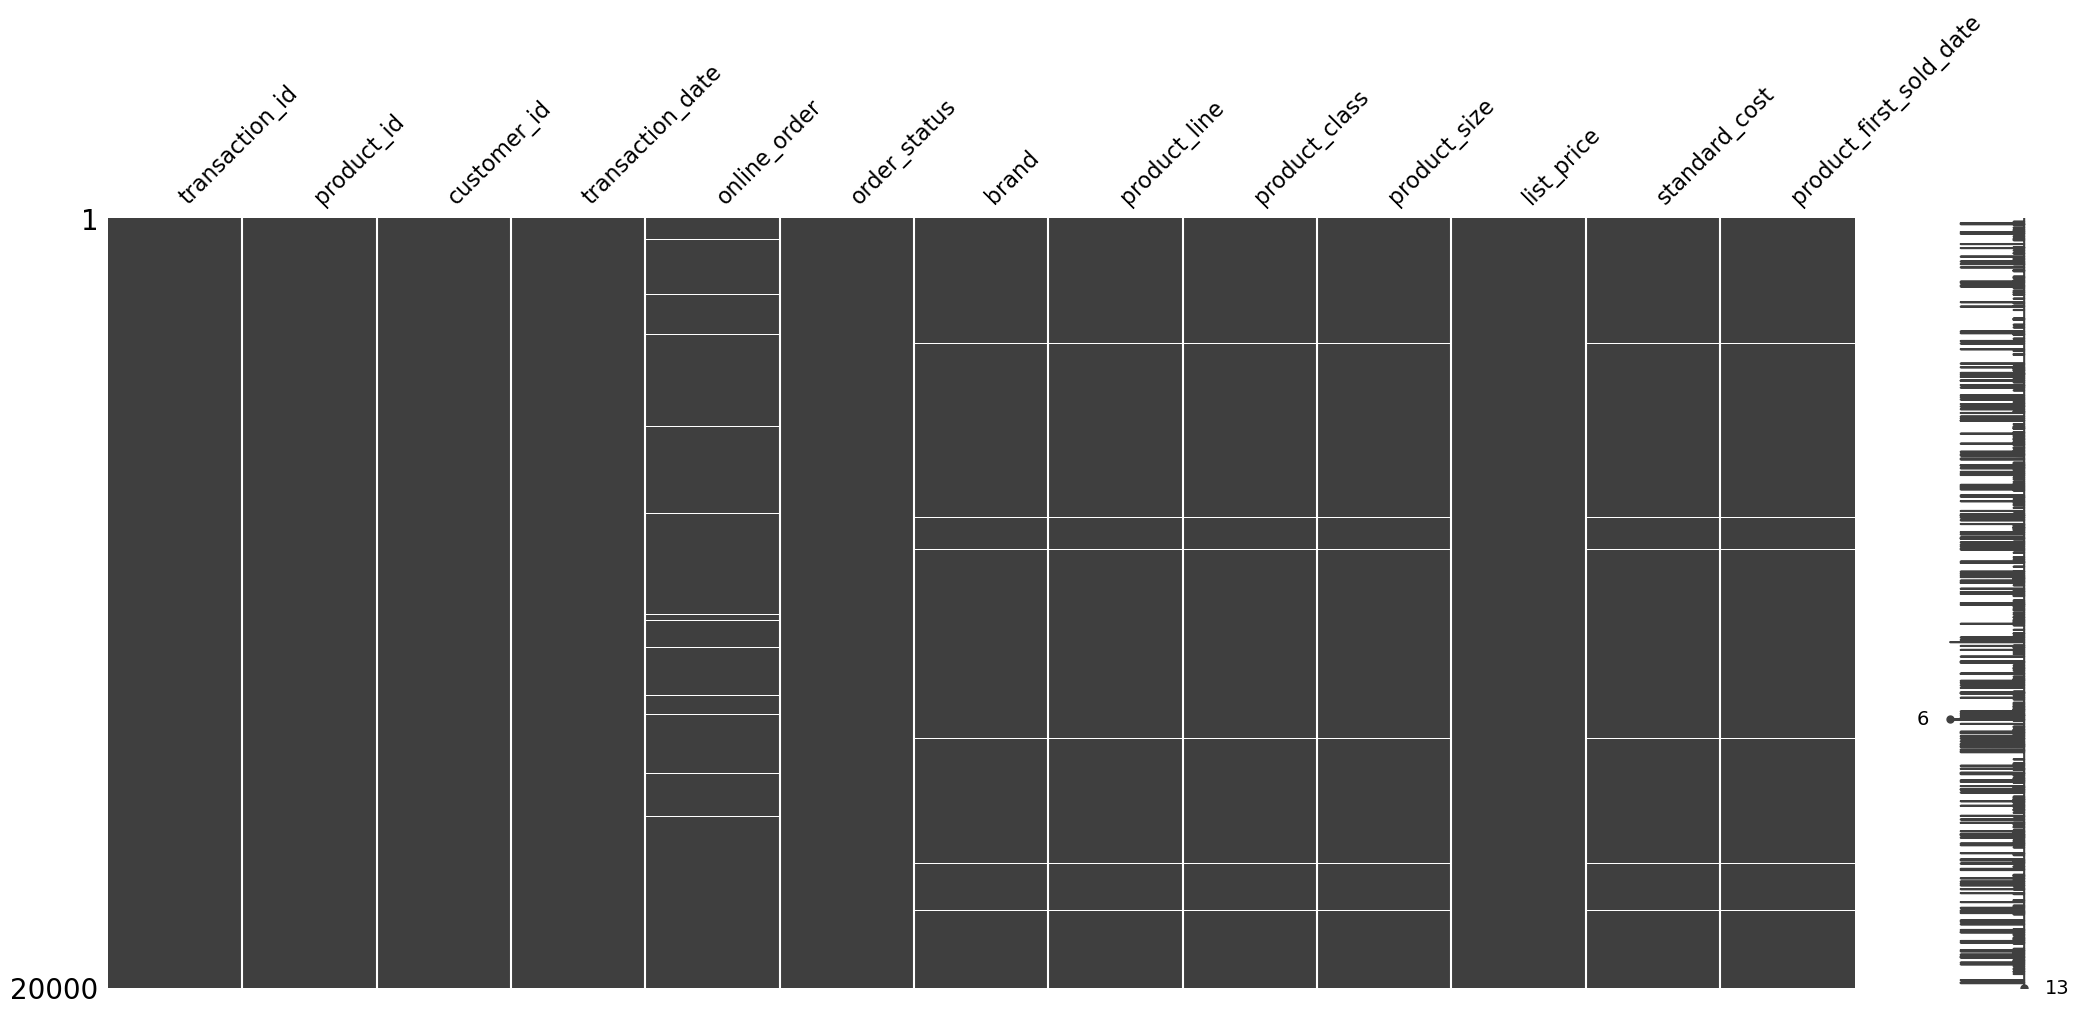

In [106]:
msno.matrix(df_transactions)

Utilizing the `missingno` library, it becomes evident that numerous rows exhibit missing values across columns such as 'brand', 'product_line', 'product_class', 'product_size', 'standard_cost', and 'product_first_sold_date'. Given that the prevalence of missing features within a record is substantial, a decision has been made to eliminate all rows containing these missing values.

<details>
    <summary><strong>'brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date'</strong></summary>

Drop all the rows

</details>

In [107]:
# List rows with missing values in specific columns
columns_to_check = ['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']
missing_rows = df_transactions[df_transactions[columns_to_check].isnull().any(axis=1)]

In [108]:
df_transactions.drop(missing_rows.index, inplace=True)

<details>
    <summary><strong>'online_order'</strong></summary>

Replace with the 'mode' of the column.

</details>

In [109]:
df_transactions['online_order'].value_counts()

1.0    9739
0.0    9706
Name: online_order, dtype: int64

In [110]:
df_transactions['online_order'].isnull().sum()

358

<Axes: xlabel='online_order', ylabel='count'>

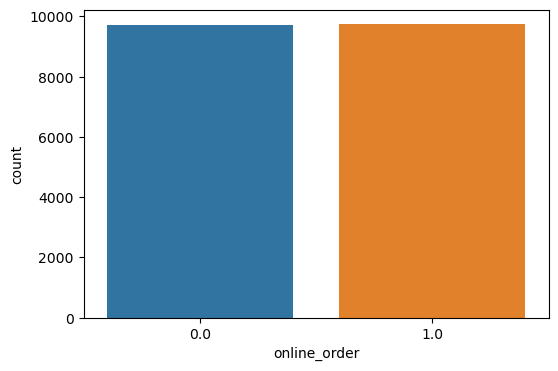

In [111]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_transactions, x='online_order')

In [112]:
mode_val = df_transactions['online_order'].value_counts().idxmax()

In [113]:
df_transactions['online_order'].replace(np.nan, mode_val, inplace=True)

In [114]:
df_transactions['online_order'].value_counts()

1.0    10097
0.0     9706
Name: online_order, dtype: int64

In [116]:
analyze_missing_values(df_transactions)

COLUMN | MISSING VALUES PERCENTAGE | MISSING VALUE COUNT
-----------------------------------------
transaction_id: 0.00% (0 missing)
product_id: 0.00% (0 missing)
customer_id: 0.00% (0 missing)
transaction_date: 0.00% (0 missing)
online_order: 0.00% (0 missing)
order_status: 0.00% (0 missing)
brand: 0.00% (0 missing)
product_line: 0.00% (0 missing)
product_class: 0.00% (0 missing)
product_size: 0.00% (0 missing)
list_price: 0.00% (0 missing)
standard_cost: 0.00% (0 missing)
product_first_sold_date: 0.00% (0 missing)

Missing Values Count:
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

Total Missing Values: 0


### 4.2.2 Identify Duplicate

In [117]:
dups = df_transactions.duplicated()
df_transactions[dups].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

The data appears to be free of duplicate values, which is a good.

### 4.2.3 Data Formatting

<details>
    <summary><strong>'online_order'</strong></summary>

"float64" to "int64"

</details>

In [119]:
df_transactions['online_order'] = df_transactions['online_order'].astype("int64")

<details>
    <summary><strong>'product_first_sold_date'</strong></summary>

"float64" to "datetime"

</details>

In [125]:
df_transactions['product_first_sold_date'] = pd.to_datetime(df_transactions['product_first_sold_date'], unit='D', origin=pd.Timestamp('1900-01-01'))

In [127]:
df_transactions.head(15)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12
5,6,25,2339,2017-03-08,1,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-12
6,7,22,1542,2017-04-21,1,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1993-07-17
7,8,15,2459,2017-07-15,0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,2009-04-14
8,9,67,1305,2017-08-10,0,Approved,Solex,Standard,medium,large,1071.23,380.74,1991-08-07
9,10,12,3262,2017-08-30,1,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,2004-08-19


### 4.2.4 Handling Inconsistencies

In [128]:
df_transactions['order_status'].value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

In [132]:
df_transactions.drop(df_transactions.loc[df_transactions['order_status'] == 'Cancelled'].index , inplace=True)

In [133]:
df_transactions['order_status'].value_counts()

Approved    19625
Name: order_status, dtype: int64

Drop 'order_status' as the customers in dataset already prepared with "Approved" for 'order_status'.

In [136]:
column_drop = ['order_status']
df_transactions.drop(columns=column_drop, inplace=True)

## 4.3 Save as CSV

In [137]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19625 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19625 non-null  int64         
 1   product_id               19625 non-null  int64         
 2   customer_id              19625 non-null  int64         
 3   transaction_date         19625 non-null  datetime64[ns]
 4   online_order             19625 non-null  int64         
 5   brand                    19625 non-null  object        
 6   product_line             19625 non-null  object        
 7   product_class            19625 non-null  object        
 8   product_size             19625 non-null  object        
 9   list_price               19625 non-null  float64       
 10  standard_cost            19625 non-null  float64       
 11  product_first_sold_date  19625 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)

In [138]:
# Checking unique values in each column
analyze_unique_values(df_transactions)

Column: transaction_id
Unique Values Count: 19625
Data Type: int64
Unique Values:
- 1
- 2
- 3
- 4
- 5
... and 19620 more unique values
------------------------------------------------------------
Column: product_id
Unique Values Count: 101
Data Type: int64
Unique Values:
- 2
- 3
- 37
- 88
- 78
... and 96 more unique values
------------------------------------------------------------
Column: customer_id
Unique Values Count: 3493
Data Type: int64
Unique Values:
- 2950
- 3120
- 402
- 3135
- 787
... and 3488 more unique values
------------------------------------------------------------
Column: transaction_date
Unique Values Count: 364
Data Type: datetime64[ns]
------------------------------------------------------------
Column: online_order
Unique Values Count: 2
Data Type: int64
Unique Values:
- 0
- 1
------------------------------------------------------------
Column: brand
Unique Values Count: 6
Data Type: object
Unique Values:
- Solex
- Trek Bicycles
- OHM Cycles
- Norco Bicycles
- Gi

In [139]:
df_transactions.to_csv('df_transactions_cleaned.csv', index=False)

# 5. Address Table

# 5.1 Data Overview

### 5.1.1 Check Header and Info

In [140]:
df_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [141]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [142]:
df_address.shape

(3999, 6)

In [143]:
df_address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

### 5.1.2 Check Unique Values

In [144]:
# Checking unique values in each column
analyze_unique_values(df_address)

Column: customer_id
Unique Values Count: 3999
Data Type: int64
Unique Values:
- 1
- 2
- 4
- 5
- 6
... and 3994 more unique values
------------------------------------------------------------
Column: address
Unique Values Count: 3996
Data Type: object
Unique Values:
- 060 Morning Avenue
- 6 Meadow Vale Court
- 0 Holy Cross Court
- 17979 Del Mar Point
- 9 Oakridge Court
... and 3991 more unique values
------------------------------------------------------------
Column: postcode
Unique Values Count: 873
Data Type: int64
Unique Values:
- 2016
- 2153
- 4211
- 2448
- 3216
... and 868 more unique values
------------------------------------------------------------
Column: state
Unique Values Count: 5
Data Type: object
Unique Values:
- New South Wales
- QLD
- VIC
- NSW
- Victoria
------------------------------------------------------------
Column: country
Unique Values Count: 1
Data Type: object
Unique Values:
- Australia
------------------------------------------------------------
Column: prop

### 5.1.3 Check Data Type

In [145]:
print_columns_by_dtype(df_address) 

Columns with data type int64: customer_id, postcode, property_valuation
------------------------------------------------------------
Columns with data type object: address, state, country
------------------------------------------------------------


### 5.1.4 Check Missing Values

In [147]:
analyze_missing_values(df_address)

COLUMN | MISSING VALUES PERCENTAGE | MISSING VALUE COUNT
-----------------------------------------
customer_id: 0.00% (0 missing)
address: 0.00% (0 missing)
postcode: 0.00% (0 missing)
state: 0.00% (0 missing)
country: 0.00% (0 missing)
property_valuation: 0.00% (0 missing)

Missing Values Count:
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

Total Missing Values: 0


### 5.1.5 Check Types of Data Attributes

In [146]:
analyze_column_types(df_address)

Categorical columns: state, country
Count: 2

Continuous columns: customer_id, address, postcode, property_valuation
Count: 4



### 5.1.6 Summary of Data Overview

The dataset consists of **3999 records** with **6 columns** encompassing both **2 categorical columns** and **4 continuous columns**.

**Issues and Resolutions**

1. **Inconsistent Values in 'state' Column**: The 'state' column contains inconsistent values that need to be addressed to ensure data integrity.

## 5.2 Data Wrangling

In [148]:
df_address1 = df_address.copy()

### 5.2.1 Identify Duplicate

In [149]:
dups = df_address.duplicated()
df_address[dups].sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

### 5.2.2 Handling Inconsistencies

In [152]:
df_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [153]:
df_address['state'].replace({'New South Wales': 'NSW', 'Victoria': 'VIC'}, inplace=True)

In [154]:
df_address['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

## 5.3 Save as CSV

In [155]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [156]:
# Checking unique values in each column
analyze_unique_values(df_address)

Column: customer_id
Unique Values Count: 3999
Data Type: int64
Unique Values:
- 1
- 2
- 4
- 5
- 6
... and 3994 more unique values
------------------------------------------------------------
Column: address
Unique Values Count: 3996
Data Type: object
Unique Values:
- 060 Morning Avenue
- 6 Meadow Vale Court
- 0 Holy Cross Court
- 17979 Del Mar Point
- 9 Oakridge Court
... and 3991 more unique values
------------------------------------------------------------
Column: postcode
Unique Values Count: 873
Data Type: int64
Unique Values:
- 2016
- 2153
- 4211
- 2448
- 3216
... and 868 more unique values
------------------------------------------------------------
Column: state
Unique Values Count: 3
Data Type: object
Unique Values:
- NSW
- QLD
- VIC
------------------------------------------------------------
Column: country
Unique Values Count: 1
Data Type: object
Unique Values:
- Australia
------------------------------------------------------------
Column: property_valuation
Unique Values 

In [157]:
df_address.to_csv('df_address_cleaned.csv', index=False)